L'obbiettivo è quello di creare una rete neurale che riconosca tutti i numeri con una cifra scritti a mano.

In questo notebook si possono ignorare i capitoli denotati: "Allenamento" in quanto i parametri delle reti neurali sono stati salvati in file appositi.

# DNN

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np


labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converte una lista di numeri in una matrice con tante colonne quanti elementi della lista.
# la riga n-esima avrà 1 nell' elemento con indice corrispondente all'approssimazione per difetto dell'elemento n-esimo della lista originale
cat=keras.utils.to_categorical(labels)
cat2=cat.astype(int)
# print(cat)
# print(cat2)
# questa sarà la forma dell'autput finale che avrò se voglio indovinare una categoria

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
[7 2 1 ... 4 5 6]
X_train shape: (60000, 784)
X_test shape: (10000, 784)
An example of a data point with label 4 (which corresponds to label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after the use of 'to_categorical'):


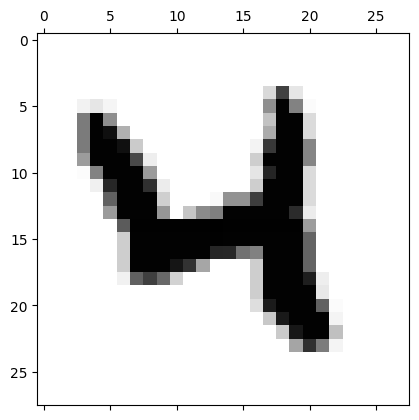

In [7]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

trained=False # uso questa variabile per capire se ho allenato la rete in questa esecuzione

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels in each side

# numer of outputs
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# gli Y sono i label

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
# ogni input sono 6000 immagini con 28x28 pixel e ogni output sono 20 interi da 0 a 10

print (Y_test)
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape) # 28x28 = 784
print('X_test shape:', X_test.shape)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
# le immagini in bianco e nero hanno come codifica del colore di ogni pixel un numero tra 0 e 255

# look at an example of data point
print('An example of a data point with label', Y_train[20], '(which corresponds to label', (keras.utils.to_categorical(Y_train, num_classes))[20], 'after the use of \'to_categorical\'):')
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary') # X_train[20,:] prende il vettore che è l'elemento 20 della lista X_train
plt.show()

In [8]:
# funzioni per la costruzione della rete neurale 

# da eseguire dopo blocchi precedenti 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    Model = Sequential()
    # add a dense all-to-all relu layer
    Model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    Model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    Model.add(Dropout(0.5)) # ad ogni epoca la metà dei nodi verrà disattivata (questo non è un vero e proprio ma una istruzione che si applica al layer prima)
    # soft-max output layer
    Model.add(Dense(num_classes, activation='softmax'))
    
    return Model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])# accuratezza (usata spesso nelle categorizzazioni)
    return model



## allenamento


In [9]:
# allenamento:

# da eseguire dopo blocchi precedenti 

import pickle

# training parameters
batch_s = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()
model_DNN.summary()

# train DNN and store training info in history
if not trained:
	Y_train = keras.utils.to_categorical(Y_train, num_classes)
	Y_test = keras.utils.to_categorical(Y_test, num_classes)

	history = model_DNN.fit(X_train, Y_train,
			batch_size=batch_s,
			epochs=epochs,
			verbose=1,
			validation_data=(X_test, Y_test))
	model_DNN.save(filepath='./DNN_model.h5', include_optimizer=True)
	with open('history.pkl', 'wb') as f:
		pickle.dump(history, f)
	trained=True
else:
	model_DNN = tf.keras.models.load_model(filepath='./DNN_model.h5')
	with open('history.pkl', 'rb') as f:
		history = pickle.load(f)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 100)               40100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7587 - acc: 0.7756 - val_loss: 0.3098 - val_acc: 0.9166
Epoch 2/5
1875/1875

/home/michelecrosi/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## valutazione performance

313/313 [==============================] - 1s 2ms/step - loss: 0.1574 - acc: 0.9523
Test loss: 0.157414048910141
Test accuracy: 0.9523000121116638


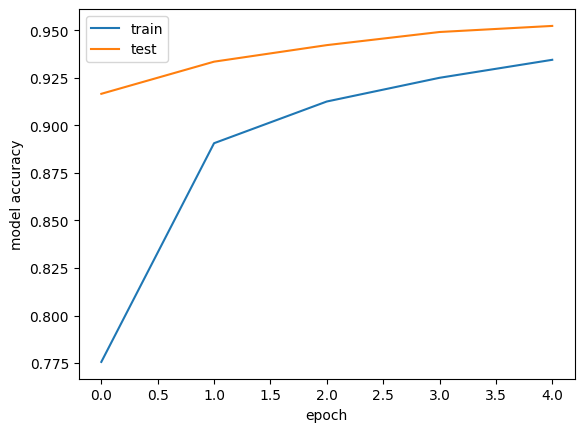

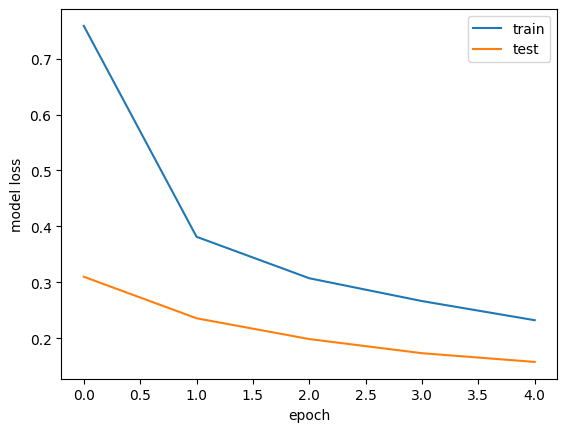

In [11]:
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

reshaped=False
# mi serve per il prossimo blocco

313/313 [==============================] - 1s 2ms/step


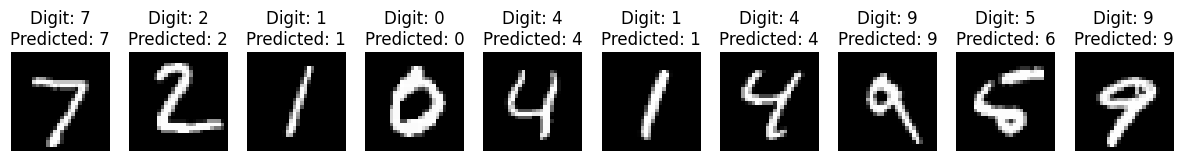

In [12]:
predictions = model_DNN.predict(X_test)

if not reshaped:
	X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
	reshaped=True

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [14]:

# A=np.array([1,1])
# B=A.reshape(2,1)
# print("A0:",A)
# print("B0:",B)
# print("A1:",A)
# print("B1:",B)
# B=A.reshape(1,2)
# print("A2:",A)
# print("B2:",B)

# il metodo reshape non cambia la misura dell'array che lo chiama

# 12.1

Usando il modello presentato dal professore dobbiamo aumentare il numero di epoche di allenamento e vedere se in questo modo la rete neurale è in grado di migliorare.  
L'allenamento è stato fatto tramite diversi ottimizzatori:
- SGD
- Adam
- Adadelta

## SGD

In [15]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import pickle



seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28

num_classes = 10


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

model = Sequential()
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
				optimizer=SGD(),
				metrics=['acc'])



model.summary()


Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dense_4 (Dense)             (None, 100)               40100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### allenamento

In [16]:
batch_s = 32
epochs = 100

history = model.fit(X_train, Y_train,
		batch_size=batch_s,
		epochs=epochs,
		shuffle=True,
		verbose=1,
		validation_data=(X_test, Y_test))

model.save(filepath='./es12.1/DNN_model_SGD.h5', include_optimizer=True)
with open('./es12.1/history_SGD.pkl', 'wb') as f:
	pickle.dump(history, f)


Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7881 - acc: 0.7679 - val_loss: 0.3152 - val_acc: 0.9127
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3924 - acc: 0.8889 - val_loss: 0.2409 - val_acc: 0.9306
Epoch 3/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3168 - acc: 0.9121 - val_loss: 0.2006 - val_acc: 0.9420
Epoch 4/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2670 - acc: 0.9251 - val_loss: 0.1745 - val_acc: 0.9494
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2377 - acc: 0.9334 - val_loss: 0.1577 - val_acc: 0.9517
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2128 - acc: 0.9393 - val_loss: 0.1444 - val_acc: 0.9560
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1933 - acc: 0.9456 - val_loss: 0.1297 - val_acc: 0.9599
Epoch 8/100
1875/1875 [==============================] 

### valutazione performance

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - acc: 0.9827
Test loss: 0.0639362633228302
Test accuracy: 0.982699990272522


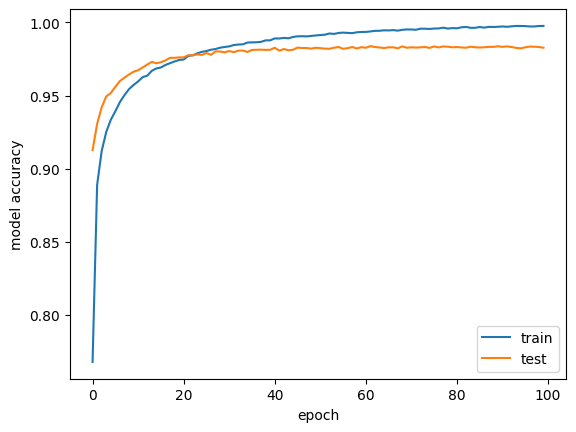

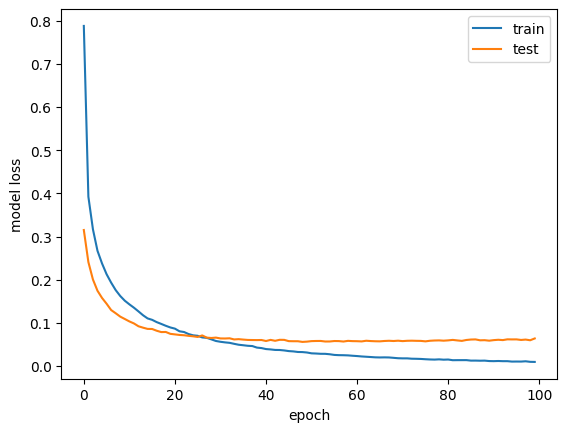

313/313 [==============================] - 1s 2ms/step


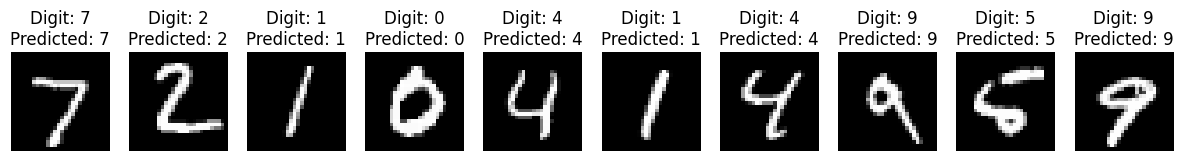

In [17]:
img_rows, img_cols = 28, 28


model= tf.keras.models.load_model(filepath='./es12.1/DNN_model_SGD.h5')
with open('./es12.1/history_SGD.pkl', 'rb') as f:
	history = pickle.load(f)


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

predictions = model.predict(X_test)
X_test_V_M = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_V_M[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Come si vede, dopo aver allenato per un maggior numero di epoche il modello, questo è in grado di prevedere anche la pen'ultima cifra raffigurata. La Loss function è inoltre diminuita.

## Adam

In [20]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
import pickle



seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28

num_classes = 10


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

model = Sequential()
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
				optimizer=Adam(),
				metrics=['acc'])





model.summary()


Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dense_10 (Dense)            (None, 100)               40100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### allenamento

In [21]:
batch_s = 32
epochs = 100

history = model.fit(X_train, Y_train,
		batch_size=batch_s,
		epochs=epochs,
		shuffle=True,
		verbose=1,
		validation_data=(X_test, Y_test))

model.save(filepath='./es12.1/DNN_model_Adam.h5', include_optimizer=True)
with open('./es12.1/history_Adam.pkl', 'wb') as f:
	pickle.dump(history, f)
      


Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2781 - acc: 0.9191 - val_loss: 0.1156 - val_acc: 0.9632
Epoch 2/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1199 - acc: 0.9653 - val_loss: 0.0995 - val_acc: 0.9685
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0872 - acc: 0.9744 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0672 - acc: 0.9796 - val_loss: 0.0808 - val_acc: 0.9772
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0569 - acc: 0.9822 - val_loss: 0.0830 - val_acc: 0.9761
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0477 - acc: 0.9849 - val_loss: 0.0782 - val_acc: 0.9779
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0403 - acc: 0.9882 - val_loss: 0.0987 - val_acc: 0.9746
Epoch 8/100
1875/1875 [=========================

### valutazione performance

313/313 [==============================] - 1s 2ms/step - loss: 0.3049 - acc: 0.9838
Test loss: 0.3049004375934601
Test accuracy: 0.9837999939918518


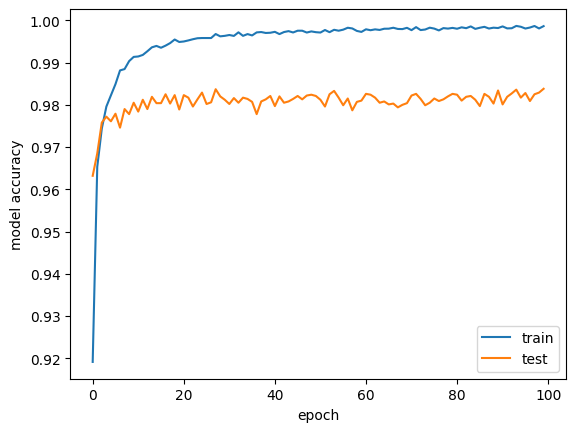

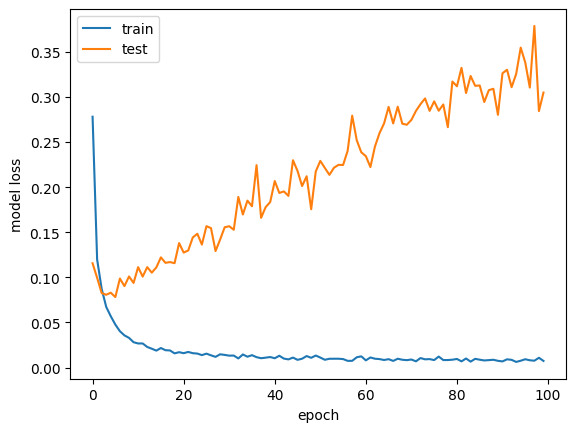

313/313 [==============================] - 1s 2ms/step


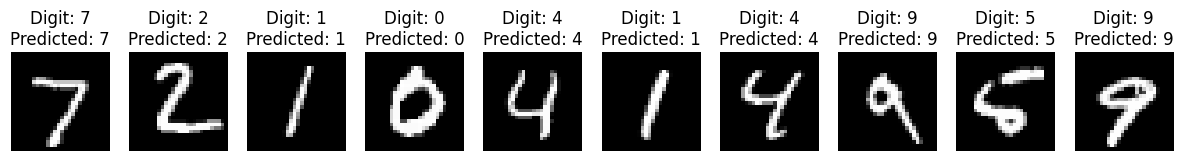

In [22]:
img_rows, img_cols = 28, 28


model= tf.keras.models.load_model(filepath='./es12.1/DNN_model_Adam.h5')
with open('./es12.1/history_Adam.pkl', 'rb') as f:
	history = pickle.load(f)


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

predictions = model.predict(X_test)
X_test_V_M = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_V_M[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Adadelta

In [23]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import pickle



seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28

num_classes = 10


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

model = Sequential()
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
				optimizer=Adadelta(),
				metrics=['acc'])



model.summary()


Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 100)               40100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### allenamento

In [25]:
batch_s = 32
epochs = 100

history = model.fit(X_train, Y_train,
		batch_size=batch_s,
		epochs=epochs,
		shuffle=True,
		verbose=1,
		validation_data=(X_test, Y_test))

model.save(filepath='./es12.1/DNN_model_Adadelta.h5', include_optimizer=True)
with open('./es12.1/history_Adadelta.pkl', 'wb') as f:
	pickle.dump(history, f)
      


Epoch 1/100
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2819 - acc: 0.1453 - val_loss: 2.1444 - val_acc: 0.2867
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - loss: 2.1059 - acc: 0.2731 - val_loss: 1.9805 - val_acc: 0.4850
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9592 - acc: 0.3882 - val_loss: 1.8223 - val_acc: 0.5883
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8174 - acc: 0.4681 - val_loss: 1.6677 - val_acc: 0.6465
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6866 - acc: 0.5240 - val_loss: 1.5236 - val_acc: 0.6888
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5642 - acc: 0.5637 - val_loss: 1.3925 - val_acc: 0.7193
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4595 - acc: 0.5932 - val_loss: 1.2755 - val_acc: 0.7484
Epoch 8/100
1875/1875 [=========================

### valutazione performance

313/313 [==============================] - 1s 3ms/step - loss: 0.2625 - acc: 0.9278
Test loss: 0.26248085498809814
Test accuracy: 0.9277999997138977


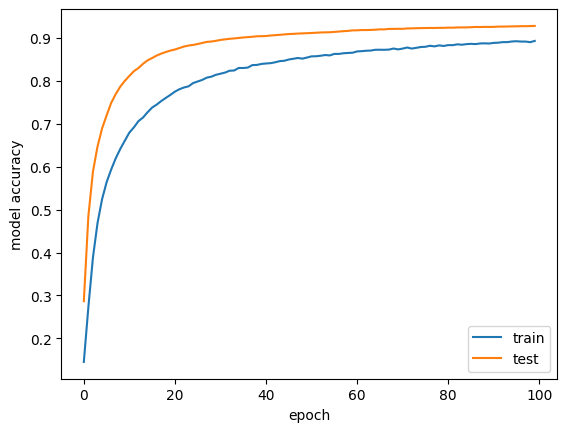

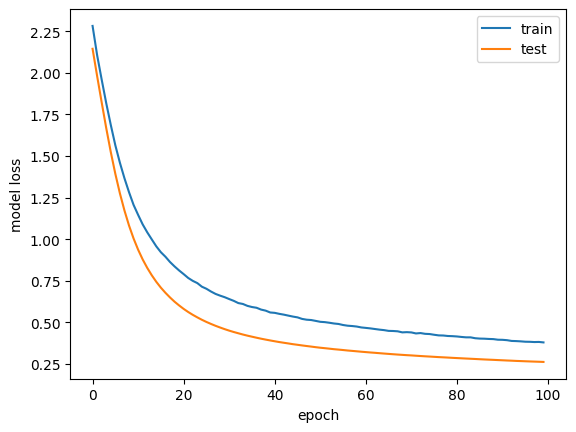

313/313 [==============================] - 1s 2ms/step


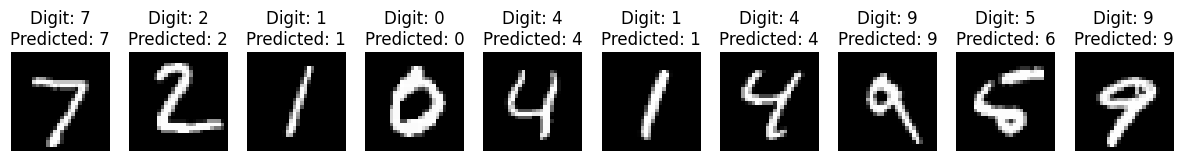

In [24]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import pickle

seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28


model= tf.keras.models.load_model(filepath='./es12.1/DNN_model_Adadelta.h5')
with open('./es12.1/history_Adadelta.pkl', 'rb') as f:
	history = pickle.load(f)


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

predictions = model.predict(X_test)
X_test_V_M = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_V_M[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Adadelta continua invece a sbagliare la penultima immagine

## comparazione performance (ultima epoca)


SGD:  
loss: 0.0096  
acc: 0.9976   
val_loss: 0.0639  
val_acc: 0.9827   
  
Adam:  
loss: 0.0074  
acc: 0.9986  
val_loss: 0.3049  
val_acc: 0.9838  
  
Adadelta:  
loss: 0.3798  
acc: 0.8929  
val_loss: 0.2625  
val_acc: 0.9278  

Adam e SGD sono i più efficaci nel minimizzare la loss function dei parametri di training, in questo caso tuttavia il numero di epoche è risultato eccessivo per Adam e per questo motivo vi è stato un overfitting. La loss function calcolata con i dati di validazione è infatti cresciuta con l'aumentare delle epoche a partire da una certa epoca. Questo ha fatto si che SGD abbia la minor loss function sui dati di test.  
SGD è risultato più performante di Adadelta.  
Nonostante l'overfitting Adam ha avuto performance sui dati di test non molto peggiori a quelle ottenute da Adadelta (in termini di loss function).

# 12.2

In questo esercizio costruiamo una rete neurale di tipo CNN (non più DNN) per riconoscere i numeri scritti a mano.

## SGD

In [25]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
import pickle
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28

num_classes = 10

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_sh = (img_rows, img_cols, 1)

# print(input_sh)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

def create_CNN():
	Model = Sequential()
	Model.add(Conv2D(10, kernel_size=(5, 5),
                  		padding='same',
						activation='relu',
						input_shape=input_sh))
    # il primo numero corrisponde al numero di filtri
	# il kernel la matrice con i pesi che muovo nella mia immagine
    # padding='same': Padding aggiunto in modo che l'output abbia le stesse dimensioni dell'input (può non essere costante in entrambi i lati se 1+(W-F+2P)/S non è intero)
	# ho quindi 10 matrici ognuna con 5*5 pesi e un bias (260 parametri)
	# se non specificato lo stripe è di 1 e il paddle è assente

	# aggiungo un pooling layer
	Model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # questo non è un vero e proprio layer (non ha parametri associati)
	
	# stride=(2,2): stide di 2 sia in altezza che in larghezza
	# per ogni lato: n_out=int((W-F)/S + 1)=int((28-2)/2 + 1)=14
	# un layer indipendente viene aggiunto dopo ogni canale (10 canali in questo caso)

	# aggiungo un layer di dropout
	Model.add(Dropout(0.25))
    # questo non è un vero e proprio layer (non ha parametri associati)
    
	# può essere messo dopo a layer senza pesi associati e disattiva semplicemente una certa percentuale di output
    
	Model.add(Conv2D(24, 
                  kernel_size=(2, 2), 
                  strides=(2, 2), 
                  activation='relu'))
	# per ogni lato e per ogni filtro: n_out=1+int((W-F+2P)/S) =1+int((14-2+2x0)/2) = 1+6 = 7
    # maschere diverse hanno pesi diversi
	# canali diversi hanno diversi pesi di convoluzione ma stesso bias e sono sommate fra loro le convoluzioni corrispondenti alla stessa posizione
	# il numero degli output dovrà essere: (dimensione_matrice_convoluzione*numero di canali +1)*numero filtri=(2*2*10 + 1)*24=41*24=984
     
	Model.add(Flatten())
    # questo non è un vero e proprio layer (non ha parametri associati)
     
	Model.add(Dense(10, activation='relu'))
	Model.add(Dropout(0.5))
	Model.add(Dense(10, activation='softmax'))

	# compile the model
	Model.compile(loss=keras.losses.categorical_crossentropy,
					optimizer='SGD',
					metrics=['acc'])
	return Model

model_CNN=create_CNN()
model_CNN.summary()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 10)        0         
 D)                                                              
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 24)          984       
                                                                 
 flatten (Flatten)           (None, 1176)              0         
                                                                 
 dense_15 (Dense)     

### allenamento

In [28]:
batch_size = 32
epochs = 100

history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
		  shuffle=True,
          verbose=1,
          validation_data=(X_test, Y_test))

model_CNN.save(filepath='./es12.2/CNN_model_SGD.h5', include_optimizer=True)
with open('./es12.2/history_SGD.pkl', 'wb') as f:
	pickle.dump(history, f)

Epoch 1/100
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6717 - acc: 0.3935 - val_loss: 0.9112 - val_acc: 0.8159
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3212 - acc: 0.5023 - val_loss: 0.7056 - val_acc: 0.8714
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2285 - acc: 0.5284 - val_loss: 0.5771 - val_acc: 0.8907
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 1.1337 - acc: 0.5646 - val_loss: 0.4758 - val_acc: 0.9162
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0760 - acc: 0.5869 - val_loss: 0.4043 - val_acc: 0.9260
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0437 - acc: 0.5950 - val_loss: 0.3520 - val_acc: 0.9336
Epoch 7/100
1875/1875 [==============================] - 12s 7ms/step - loss: 1.0060 - acc: 0.6083 - val_loss: 0.3182 - val_acc: 0.9438
Epoch 8/100
1875/1875 [=========================

### valutazione performance

313/313 [==============================] - 1s 3ms/step - loss: 0.1281 - acc: 0.9799
Test loss: 0.12812161445617676
Test accuracy: 0.9799000024795532


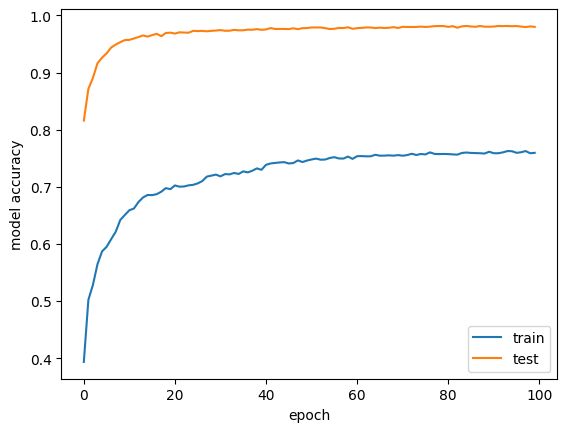

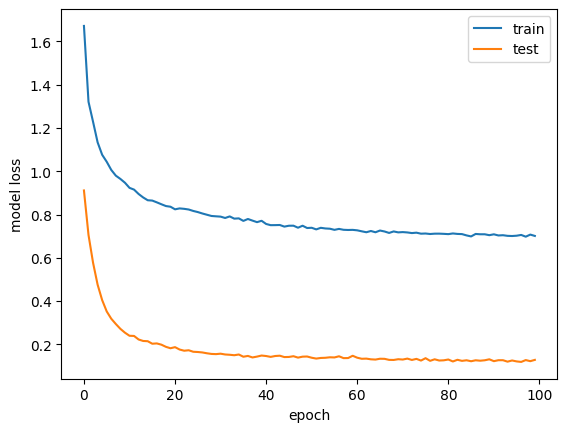

313/313 [==============================] - 1s 3ms/step


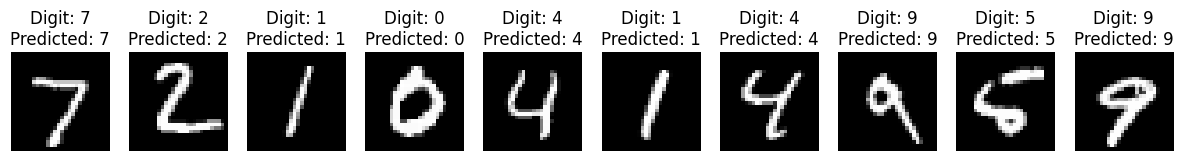

In [27]:
img_rows, img_cols = 28, 28

model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_SGD.h5')
with open('./es12.2/history_SGD.pkl', 'rb') as f:
	history = pickle.load(f)

score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# print(X_test.shape)
predictions = model_CNN.predict(X_test)
X_test_V_M = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_V_M[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Adam

In [29]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
import pickle
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28

num_classes = 10

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_sh = (img_rows, img_cols, 1)

# print(input_sh)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

def create_CNN():
	Model = Sequential()
	Model.add(Conv2D(10, kernel_size=(5, 5),
                  		padding='same',
						activation='relu',
						input_shape=input_sh))
    # il primo numero corrisponde al numero di filtri
	# il kernel la matrice con i pesi che muovo nella mia immagine
    # padding='same': Padding aggiunto in modo che l'output abbia le stesse dimensioni dell'input (può non essere costante in entrambi i lati se 1+(W-F+2P)/S non è intero)
	# ho quindi 10 matrici ognuna con 5*5 pesi e un bias (260 parametri)
	# se non specificato lo stripe è di 1 e il paddle è assente

	# aggiungo un pooling layer
	Model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # questo non è un vero e proprio layer (non ha parametri associati)
	
	# stride=(2,2): stide di 2 sia in altezza che in larghezza
	# per ogni lato: n_out=int((W-F)/S + 1)=int((28-2)/2 + 1)=14
	# un layer indipendente viene aggiunto dopo ogni canale (10 canali in questo caso)

	# aggiungo un layer di dropout
	Model.add(Dropout(0.25))
    # questo non è un vero e proprio layer (non ha parametri associati)
    
	# può essere messo dopo a layer senza pesi associati e disattiva semplicemente una certa percentuale di output
    
	Model.add(Conv2D(24, 
				kernel_size=(2, 2), 
				strides=(2, 2), 
				activation='relu'))
	# per ogni lato e per ogni filtro: n_out=1+int((W-F+2P)/S) =1+int((14-2+2x0)/2) = 1+6 = 7
    # maschere diverse hanno pesi diversi
	# canali diversi hanno diversi pesi di convoluzione ma stesso bias e sono sommate fra loro le convoluzioni corrispondenti alla stessa posizione
	# il numero degli output dovrà essere: (dimensione_matrice_convoluzione*numero di canali +1)*numero filtri=(2*2*10 + 1)*24=41*24=984
     
	Model.add(Flatten())
    # questo non è un vero e proprio layer (non ha parametri associati)
     
	Model.add(Dense(10, activation='relu'))
	Model.add(Dropout(0.5))
	Model.add(Dense(10, activation='softmax'))

	# compile the model
	Model.compile(loss=keras.losses.categorical_crossentropy,
					optimizer='Adam',
					metrics=['acc'])
	return Model

model_CNN_Adam=create_CNN()
model_CNN_Adam.summary()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 10)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 24)          984       
                                                                 
 flatten_2 (Flatten)         (None, 1176)              0         
                                                                 
 dense_19 (Dense)     

### allenamento

In [31]:
batch_size = 32
epochs = 100

history = model_CNN_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
		  shuffle=True,
          verbose=1,
          validation_data=(X_test, Y_test))

model_CNN_Adam.save(filepath='./es12.2/CNN_model_Adam.h5', include_optimizer=True)
with open('./es12.2/history_Adam.pkl', 'wb') as f:
	pickle.dump(history, f)

Epoch 1/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3465 - acc: 0.4869 - val_loss: 0.4925 - val_acc: 0.9331
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1100 - acc: 0.5759 - val_loss: 0.3730 - val_acc: 0.9507
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0595 - acc: 0.5973 - val_loss: 0.3428 - val_acc: 0.9535
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0190 - acc: 0.6227 - val_loss: 0.3323 - val_acc: 0.9596
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9938 - acc: 0.6333 - val_loss: 0.2751 - val_acc: 0.9666
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9760 - acc: 0.6380 - val_loss: 0.2835 - val_acc: 0.9651
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9570 - acc: 0.6437 - val_loss: 0.2468 - val_acc: 0.9672
Epoch 8/100
1875/1875 [=========================

### valutazione performance

313/313 [==============================] - 1s 4ms/step - loss: 0.1906 - acc: 0.9775
Test loss: 0.19064371287822723
Test accuracy: 0.9775000214576721


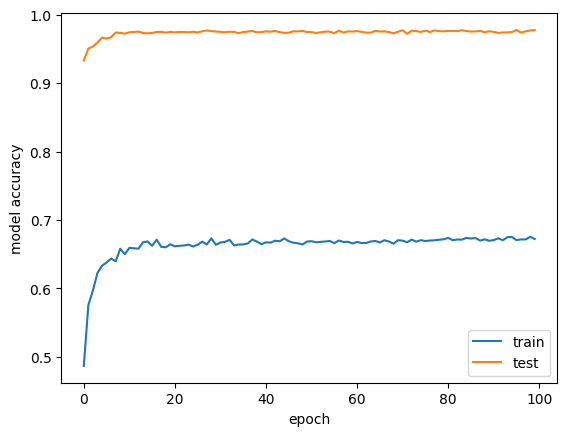

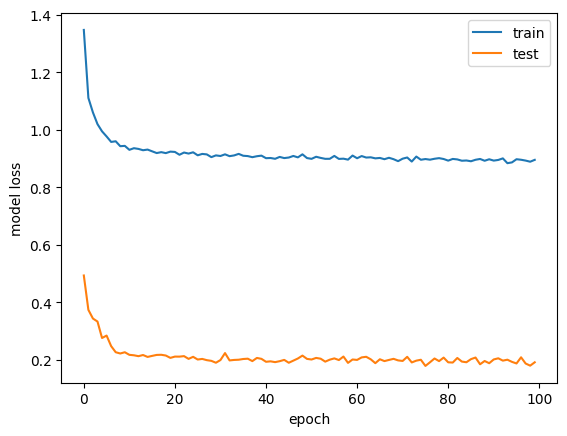

313/313 [==============================] - 1s 3ms/step


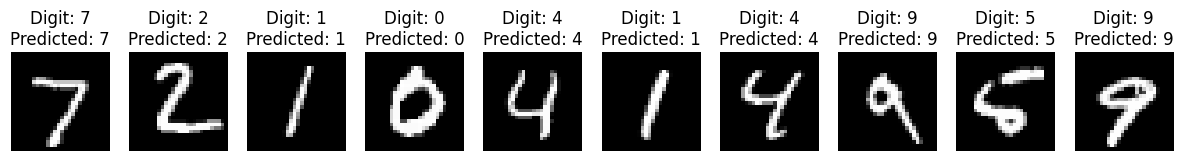

In [30]:
img_rows, img_cols = 28, 28

model_CNN_Adam= tf.keras.models.load_model(filepath='./es12.2/CNN_model_Adam.h5')
with open('./es12.2/history_Adam.pkl', 'rb') as f:
	history = pickle.load(f)

score = model_CNN_Adam.evaluate(X_test, Y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# print(X_test.shape)
predictions = model_CNN_Adam.predict(X_test)
X_test_V_M = X_test.reshape(X_test.shape[0], img_rows, img_cols) # torna a essere un vettore di matrici (righe, colonne)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_V_M[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# 12.3

Testo adesso le reti neurali da me create per vedere se sanno riconoscere dei numeri scritti a mano da me (che non fanno parte ne del set di validazione ne dei dati su cui si sono allenate).

## SGD

Image size: 28x28


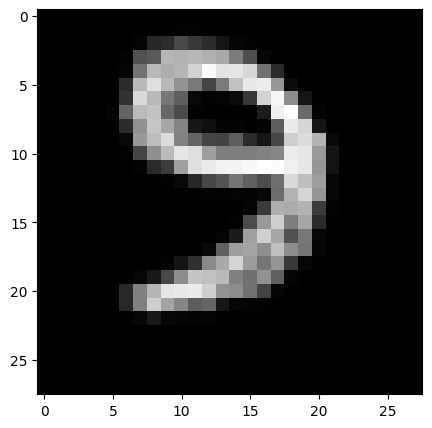

(28, 28)


In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28

digit_filename = "./es12.3/numbers/9_2.0.png"
digit_in = Image.open(digit_filename).convert('L')
# L converte l'immagine in modalità scala di grigi

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load()
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

# print(data)

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

1/1 [==============================] - 0s 52ms/step


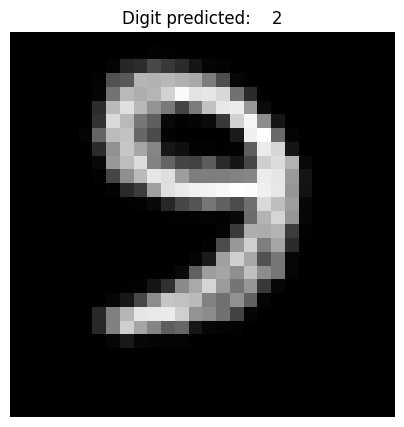

In [34]:
# print(data.shape)

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
    input_sh = (img_rows, img_cols, 1)

# print(data.shape)

model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_SGD.h5')

pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()


La mia rete neurale fa fatica a riconoscere i nove (problema riscontrato anche per le CNN con stessa architettura ma allenate con un ottimizzatore diverso)

Image size: 28x28
1/1 [==============================] - 0s 52ms/step


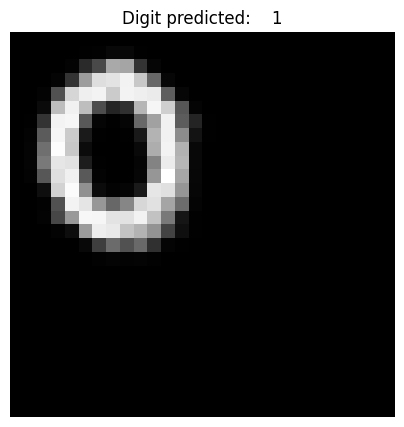

In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28

digit_filename = "./es12.3/numbers/0_topleft.png"
digit_in = Image.open(digit_filename).convert('L')
# L converte l'immagine in modalità scala di grigi

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load()
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
    input_sh = (img_rows, img_cols, 1)


model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_SGD.h5')

pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()



La rete neurale non sa riconoscere uno 0 se questo non è centrato. Questo indica una carenza di numeri non centrati all'interno dei dati su cui questa si è esercitata.

Image size: 28x28
1/1 [==============================] - 0s 48ms/step


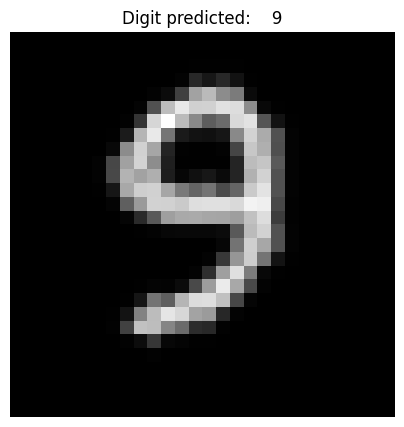

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28

digit_filename = "./es12.3/numbers/9.png"
digit_in = Image.open(digit_filename).convert('L')
# L converte l'immagine in modalità scala di grigi

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load()
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
    input_sh = (img_rows, img_cols, 1)


model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_SGD.h5')

pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()


[]
Image size: 28x28
1/1 [==============================] - 0s 59ms/step
Image size: 28x28
1/1 [==============================] - 0s 21ms/step
Image size: 28x28
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
1/1 [==============================] - 0s 18ms/step
Image size: 28x28
1/1 [==============================] - 0s 19ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 36ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 25ms/step
Image size: 28x28
1/1 [==============================] - 0s 23ms/step


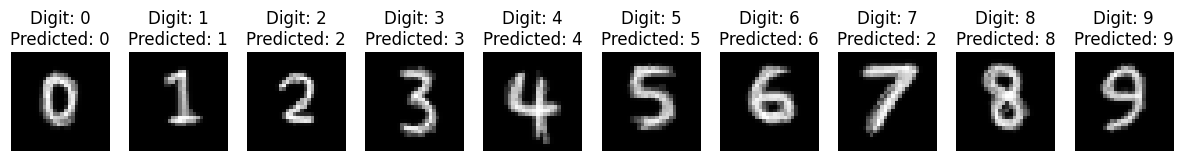

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28
data = []
print(data)
model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_SGD.h5')

plt.figure(figsize=(15, 15))
for i in range(10):
	data.append([])
	# print(i)
	digit_filename = f"./es12.3/numbers/{i}.png"
	digit_in = Image.open(digit_filename).convert('L')
	# L converte l'immagine in modalità scala di grigi

	ydim, xdim = digit_in.size
	print("Image size: "+str(xdim)+"x"+str(ydim))
	pix=digit_in.load()
	data [i]= np.zeros((xdim, ydim))
	for j in range(ydim):
		for k in range(xdim):
			data[i][k,j]=pix[j,k]

	data[i] /= 255

	if keras.backend.image_data_format() == 'channels_first':
		data[i] = data[i].reshape(1, 1, img_rows, img_cols)
		input_sh = (1, img_rows, img_cols)
	else:
		data[i] = data[i].reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
		input_sh = (img_rows, img_cols, 1)


	pred_0 = model_CNN.predict(data[i])

	data[i] = data[i].reshape(xdim,ydim)

	ax = plt.subplot(2, 10, i + 1)
	plt.imshow(data[i], cmap='gray')    
	plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(pred_0)))
	plt.axis('off') 

plt.show()



Il 7 è classificato in modo errato.  
I dati nella cartella: "backup" invece li classifica tutti correttamente.

## Adam


[]
Image size: 28x28
1/1 [==============================] - 0s 52ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
1/1 [==============================] - 0s 22ms/step
Image size: 28x28
1/1 [==============================] - 0s 22ms/step
Image size: 28x28
1/1 [==============================] - 0s 22ms/step
Image size: 28x28
1/1 [==============================] - 0s 18ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 23ms/step


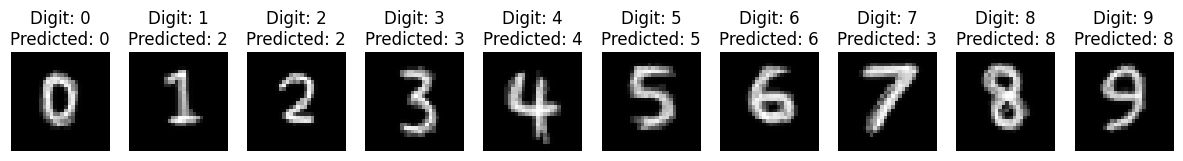

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28
data = []
print(data)
model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_Adam.h5')

plt.figure(figsize=(15, 15))
for i in range(10):
	data.append([])
	# print(i)
	digit_filename = f"./es12.3/numbers/{i}.png"
	digit_in = Image.open(digit_filename).convert('L')
	# L converte l'immagine in modalità scala di grigi

	ydim, xdim = digit_in.size
	print("Image size: "+str(xdim)+"x"+str(ydim))
	pix=digit_in.load()
	data [i]= np.zeros((xdim, ydim))
	for j in range(ydim):
		for k in range(xdim):
			data[i][k,j]=pix[j,k]

	data[i] /= 255

	if keras.backend.image_data_format() == 'channels_first':
		data[i] = data[i].reshape(1, 1, img_rows, img_cols)
		input_sh = (1, img_rows, img_cols)
	else:
		data[i] = data[i].reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
		input_sh = (img_rows, img_cols, 1)


	pred_0 = model_CNN.predict(data[i])

	data[i] = data[i].reshape(xdim,ydim)

	ax = plt.subplot(2, 10, i + 1)
	plt.imshow(data[i], cmap='gray')    
	plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(pred_0)))
	plt.axis('off') 

plt.show()


Il numero 1, il 7 e il numero 9 non sono stati classificati correttamente!
Per i dati nella cartella: "backup" invece sbaglia solo il numero 9.

Image size: 28x28
1/1 [==============================] - 0s 46ms/step


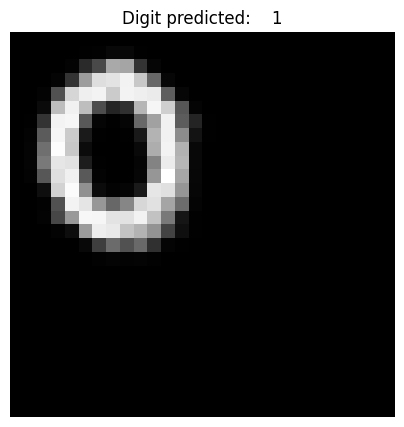

Image size: 28x28
1/1 [==============================] - 0s 64ms/step


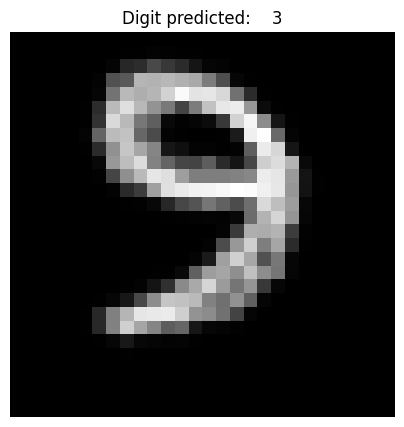

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

img_rows, img_cols = 28, 28

digit_filename = "./es12.3/numbers/0_topleft.png"
digit_in = Image.open(digit_filename).convert('L')
# L converte l'immagine in modalità scala di grigi

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load()
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
    input_sh = (img_rows, img_cols, 1)


model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_Adam.h5')

pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()


digit_filename = "./es12.3/numbers/9_2.0.png"
digit_in = Image.open(digit_filename).convert('L')
# L converte l'immagine in modalità scala di grigi

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load()
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    input_sh = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1) # il primo numero è uno perchè è un dato solo e non un array
    input_sh = (img_rows, img_cols, 1)


model_CNN= tf.keras.models.load_model(filepath='./es12.2/CNN_model_Adam.h5')

pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

Questi due sono altri due fallimenti riscontrati